In [13]:
import matplotlib.pyplot as plt
import scipy.io as io
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.fftpack import fft
import scipy.io as io
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter


dat = io.loadmat('Subject1_2D.mat')
x = dat['LeftBackward1']

y=x[:,1][:3000]
y=fft(y)


In [14]:



def butter_highpass(cutoff, fs, order):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a

def highpass(data, fs, order,cutoff_high):
    b,a = butter_highpass(cutoff_high,fs, order=order)
    x = lfilter(b,a,data)
    return x


def butter_lowpass(cutoff, fs, order,):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a



def lowpass(data, fs, order, cutoff_low):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def bandpass1(data,fs,order,fl,fh):
    hsignal = highpass(data, fs, order,fl)
    lsignal = lowpass(hsignal, fs, order,fh)
    return lsignal




fs = 1000
order = 5

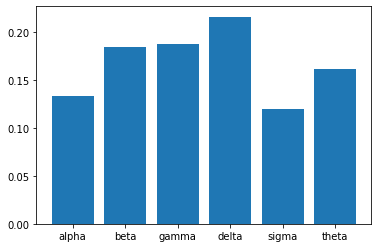

In [19]:
alpha1 = bandpass1(y, fs,order,8.1, 12.0)
beta1 = bandpass1(y,fs,order, 16.0, 36.0)
gamma1 =bandpass1(y,fs,order, 36.1, 80)
delta1 =bandpass1(y,fs,order, 1.0, 4.0)
sigma1 = bandpass1(y,fs,order, 12.1, 16.0)
theta1 = bandpass1(y, fs,order,4.1, 8.0)

sumalpha1 = sum(abs(alpha1))
sumbeta1 = sum(abs(beta1))
sumgamma1 = sum(abs(gamma1))
sumdelta1 = sum(abs(delta1))
sumsigma1 = sum(abs(sigma1))
sumtheta1 = sum(abs(theta1))


totalsum = sumalpha1+sumbeta1+sumgamma1+sumdelta1+sumsigma1+sumtheta1
t=totalsum

objects = [sumalpha1/t, sumbeta1/t, sumgamma1/t, sumdelta1/t, sumsigma1/t, sumtheta1/t]
N = len(objects)
ra = range(N)

plt.autoscale
somestuffneeded = np.arange(6)
ticks = ['alpha','beta','gamma','delta','sigma','theta']
plt.xticks(somestuffneeded, ticks)
plt.bar(ra, objects)
plt.show()